In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc


C:\Users\tmachine\AppData\Local\Temp\ipykernel_18096\554059002.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train_path = tf.keras.utils.get_file( "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path  = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

In [3]:
Column_name = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
Species = ['Setosa', 'Versicolor', 'Virginica']

In [4]:
train = pd.read_csv(train_path,names=Column_name,header=0)
test = pd.read_csv(test_path,names=Column_name,header=0)

In [5]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [6]:
test.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.9,3.0,4.2,1.5,1
1,6.9,3.1,5.4,2.1,2
2,5.1,3.3,1.7,0.5,0
3,6.0,3.4,4.5,1.6,1
4,5.5,2.5,4.0,1.3,1


In [7]:
print(train.shape)
print(test.shape)

(120, 5)
(30, 5)


In [8]:
train_y = train.pop('Species')
test_y =test.pop('Species')

In [9]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [10]:
feature_column = []
for key in train.keys():
    feature_column.append(tf.feature_column.numeric_column(key=key))
print(feature_column)    

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


<Axes: ylabel='Frequency'>

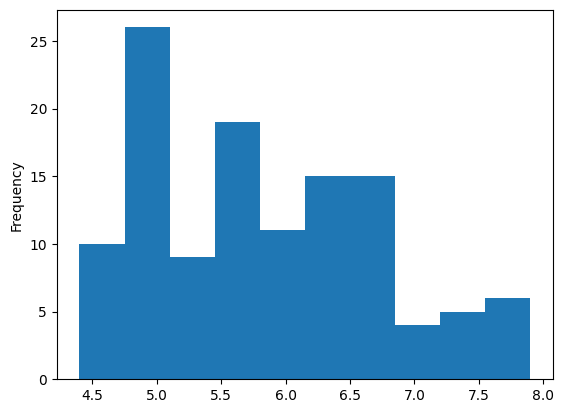

In [11]:
train['SepalLength'].plot(kind='hist')

In [12]:
def input_function(feature , label , training =True , batch_size=256):
    dataset=tf.data.Dataset.from_tensor_slices((dict(feature),label))
    if training:
        dataset=dataset.shuffle(1000).repeat()
    return dataset.batch(batch_size)    


In [13]:
classifier = tf.estimator.DNNClassifier(feature_columns=feature_column,hidden_units=[30.10],n_classes=3)


Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.

INFO:tensorflow:Using default config.

INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\tmachine\\AppData\\Local\\Temp\\tmpxtrn7zk9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worke

In [14]:
classifier.train(
    input_fn=lambda:input_function(train,train_y,training=True),steps=5000
)

Instructions for updating:
Use tf.keras instead.


INFO:tensorflow:Calling model_fn.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\tmachine\AppData\Local\Temp\tmpxtrn7zk9\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoin

In [15]:
eval_result=classifier.evaluate(
    input_fn=lambda:input_function(test,test_y,training=False))
print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.

INFO:tensorflow:Starting evaluation at 2024-02-07T11:18:14
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\tmachine\AppData\Local\Temp\tmpxtrn7zk9\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.12721s
INFO:tensorflow:Finished evaluation at 2024-02-07-11:18:14
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.6666667, average_loss = 0.57222724, global_step = 5000, loss = 0.57222724
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: C:\Users\tmachine\AppData\Local\Temp\tmpxtrn7zk9\model.ckpt-5000

Test set accuracy: 0.667



In [21]:
def input_function(features,batch_size=256):
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features =['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict={}

print("Please type numeric values as prompted")
for i in features:
    valid=True
    while valid:
        val=input(i+':')
        if not val.isdigit():
            valid=False

    predict[i] = [float(val)]

predictions = classifier.predict(input_fn=lambda:input_function(predict))
for x in predictions:
    print(x)
    class_id = x['class_ids'][0]
    probability = x['probabilities'][class_id]
    print('The prediction is "{}" ({:.1f}%)'.format(Species[class_id],100*probability))


Please type numeric values as prompted
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\tmachine\AppData\Local\Temp\tmpxtrn7zk9\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'logits': array([ 0.50589895, -0.9281578 , -1.849144  ], dtype=float32), 'probabilities': array([0.7500585 , 0.17876898, 0.07117262], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1, 2]), 'all_classes': array([b'0', b'1', b'2'], dtype=object)}
The prediction is "Setosa" (75.0%)
